# Lesson 1.6

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [29]:
# generating an array of x values
x = np.arange(0,10,1)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

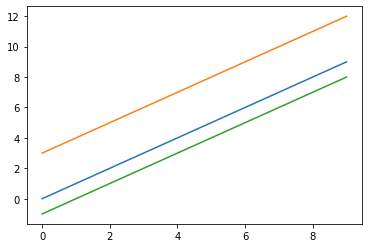

In [30]:
y = 0 + 1 * x
y2 = 3 + 1 * x 
y3 = -1 + 1 * x
#here we are changing the y-intercept, which controls the height of the line

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

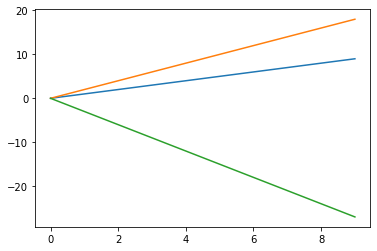

In [31]:
y = 0 + x 
y2 = 0 + 2*x 
y3 = 0 + -3*x
#here we are changing the gradient (aka coefficient), which controls the slope of the line

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

In [32]:
#The whole goal of Linear Regression is to find the "best" intercept and slope to "fit" our data!


In [33]:
# apply linear regression on the following data

In [34]:
reg_data = pd.read_csv('regression_data.csv')
reg_data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2000.0,458,453,495,469.0,19217,13.511111,38.0
1,817.0,213,256,240,236.0,8518,12.222222,10.0
2,1866.0,405,423,394,407.0,15709,23.857143,37.0
3,1174.0,268,282,298,283.0,10427,10.400000,12.0
4,3048.0,470,557,562,530.0,31631,8.222222,15.0


In [35]:
reg_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HV1,1000.0,1600.019000,1110.065447,150.00000,921.0,1246.500000,1870.00,7077.000000
IC1,1000.0,348.366000,167.285183,0.00000,237.0,321.000000,416.25,1500.000000
IC2,1000.0,395.848000,184.705254,0.00000,278.0,365.000000,469.00,1500.000000
IC3,1000.0,395.767000,165.794211,0.00000,281.0,368.000000,468.00,1311.000000
IC4,1000.0,379.984000,170.241252,0.00000,267.0,352.500000,449.75,1437.000000
IC5,1000.0,16177.241000,9641.700538,0.00000,10834.5,14000.000000,18639.00,100528.000000
AVGGIFT,1000.0,11.828555,6.685000,2.26087,7.0,10.333333,15.00,51.428571
TARGET_D,1000.0,14.980700,8.858956,2.00000,10.0,14.000000,20.00,50.000000


In [36]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

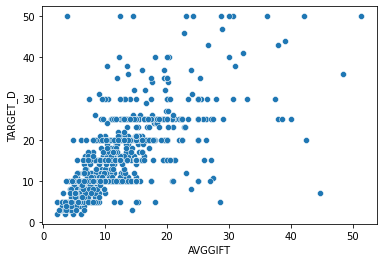

In [37]:
#let's pick the AVGGIFT variable as the one we think is the most explanatory
sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data)
plt.show()

In [38]:
reg_data['TARGET_D'].corr(reg_data['AVGGIFT'])

0.7213639344820852

In [39]:
y = reg_data['TARGET_D']
X = reg_data[['AVGGIFT']]

In [40]:
type(X)

pandas.core.frame.DataFrame

In [41]:
# to perform the linear regression we'll use the sklearn implementation of linear regression
# we will use sklearn a lot

# we first create the model. This just tells python to be ready to use a linear model, it does not actually compute anything yet

lm = linear_model.LinearRegression()

In [42]:
%%time
# we now "fit" (a.k.a. "train") the model in our data
# linear regression picks the line (i.e. the intercept and the gradient) that best "fits" our data
# we will get to the meaning of "fitting the data" in a second

lm.fit(X,y)
print(" b0 = " , lm.intercept_)
print(" b1 = "  , lm.coef_) # coefficients is an array because later we will see we can have more than one dimension for our gradient

 b0 =  3.6731826984235827
 b1 =  [0.95595086]
CPU times: user 5.79 ms, sys: 1.55 ms, total: 7.34 ms
Wall time: 2.73 ms


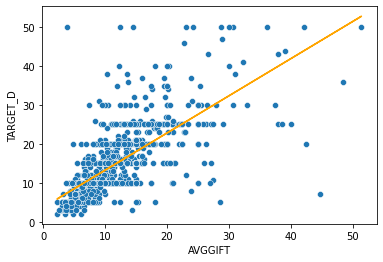

In [43]:
#let's visualize this result
regression_line = lm.intercept_ + lm.coef_[0]*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line, c = 'orange')
sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data)
plt.show()

In [44]:
#we can use this model to predict new or unseen datapoints
lm.predict([[10],[20],[35],[55]])
#what does this mean

/Users/patrickhutsch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.23269127, 22.79219984, 37.13146269, 56.25047983])

In [45]:
#the score is not great, but we have not performed any data preparation yet
print("R2-score is ", lm.score(X,y))

y_pred = lm.predict(X)
print("mean squared error (MSE) is ", mean_squared_error(y_pred,y))
np.sqrt(mean_squared_error(y_pred,y))

R2-score is  0.5203659259714741
mean squared error (MSE) is  37.60456685082154


6.132256261020208

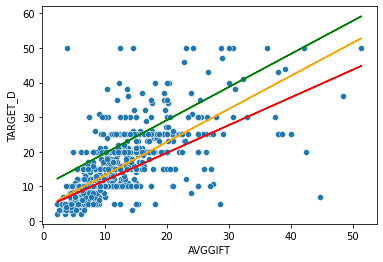

In [46]:
#any other line would have a worse result
regression_line = lm.intercept_ + lm.coef_[0]*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line, c = 'orange')
regression_line_2 = lm.intercept_ + 0.8*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line_2, c = 'red')
regression_line_3 = 10 + lm.coef_[0]*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line_3, c = 'green')
sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data)
plt.show()

In [47]:
print("MSE fitted line is ", round(mean_squared_error(regression_line, y),2))
print("MSE line 2 is      ", round(mean_squared_error(regression_line_2, y),2))
print("MSE line 3 is      ", round(mean_squared_error(regression_line_3, y),2))

MSE fitted line is  37.6
MSE line 2 is       42.09
MSE line 3 is       77.63


In [48]:
%%time
#let's bring in more variables
y = reg_data['TARGET_D']
X2 = reg_data.drop(['TARGET_D'], axis=1)
lm2 = linear_model.LinearRegression()
lm2.fit(X2,y)
print(lm2.score(X2,y))
y_pred = lm2.predict(X2)
print(mean_squared_error(y_pred,y))
#results are better, but now we cannot visualize them

0.5640186699298624
34.182077462990065
CPU times: user 17.3 ms, sys: 7.67 ms, total: 25 ms
Wall time: 8.53 ms


In [49]:
print(lm2.intercept_)
print(lm2.coef_)

# back to presentation-->

3.76043236007874
[ 2.59524877e-03 -1.02519484e-01 -9.54071068e-02 -9.46876520e-02
  2.89332425e-01 -1.26561451e-04  8.56301222e-01]


# Checking assumptions

In [50]:
# THIS IS PROBABLY THE MOST IMPORTANT LINE IN THIS NOTEBOOK
# the best variables are those that have a high correlation with the target (you want to predict, always the y), but low correlation between themselves

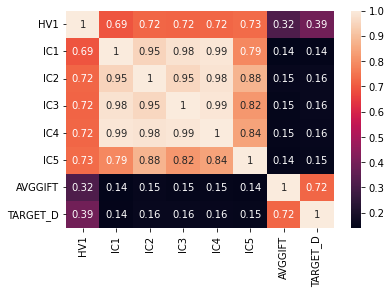

In [51]:
correlations_matrix = reg_data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [52]:
# We can see that there is a very strong positive correlation between IC1 and IC2, IC2 and IC3, IC3 and IC4
# using the concept of multicollinearity, lets drop IC1, IC3 and IC4 and keep IC2 as it has the highest corr wit the target

In [53]:
reduced_data = reg_data.drop(['IC1', 'IC3', 'IC2'],axis=1)
reduced_data.columns

Index(['HV1', 'IC4', 'IC5', 'AVGGIFT', 'TARGET_D'], dtype='object')

In [54]:
from sklearn import linear_model
y = reduced_data['TARGET_D']
X3 = reduced_data.drop(['TARGET_D'], axis=1)
lm3 = linear_model.LinearRegression()
lm3.fit(X3,y)
print(lm3.score(X3,y))
y_pred=lm3.predict(X3)
print(mean_squared_error(y_pred,y))

0.5636016060067842
34.21477636622838
